In [73]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import pandas as pd
from random import choice
from helpers.mappers import acaps_country_name_mapper, acaps_measure_mapper
from helpers.utils import generate_dates
from helpers.data_extractors import extract_oxford_measure_data,merge_country_dfs
from helpers.data_extractors import calculate_transmission_data, create_measure_success_tuple
from matplotlib import pyplot as plt
from datetime import timedelta
from collections import defaultdict
import seaborn as sns
sns.set()

In [75]:
country_name = 'Germany'

In [76]:
country_dfs = extract_oxford_measure_data()

In [77]:
daily_cases,dates = calculate_transmission_data(country_name,time_window=2)

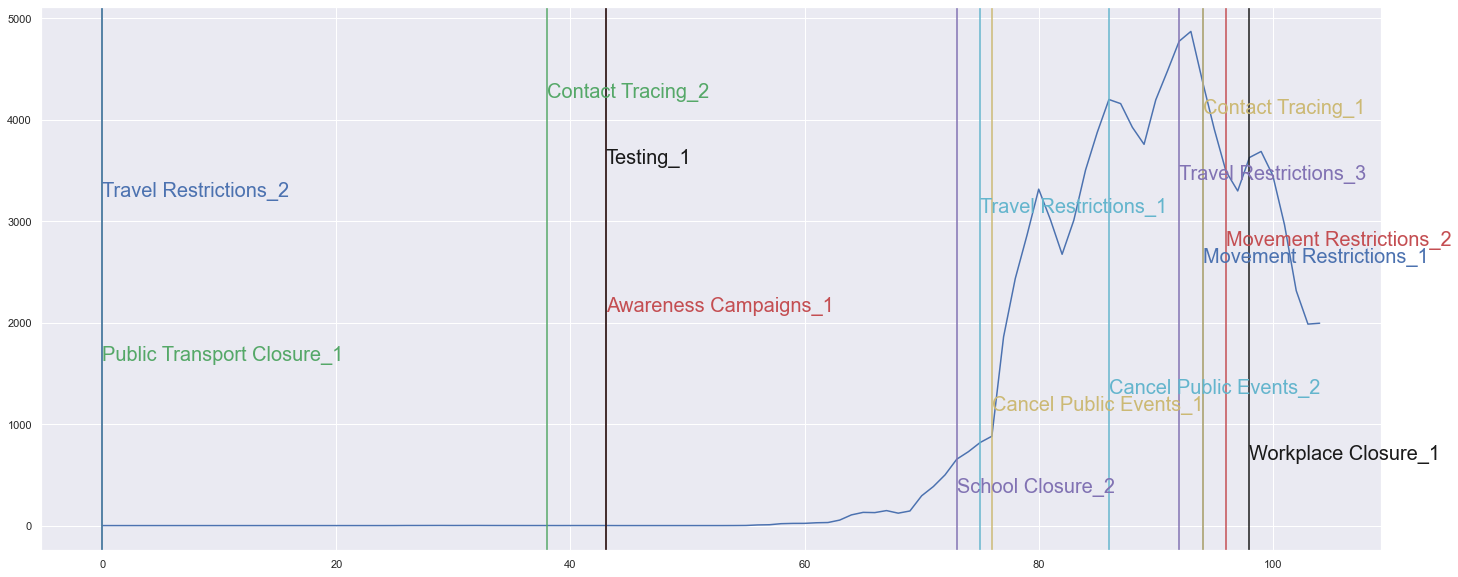

In [78]:
fig,ax = plt.subplots(figsize=(24,10))
ax.plot(daily_cases)
colors = ['b','g','r','c','m','y','k']

country_df = country_dfs[country_name]
for idx,measure in enumerate(country_df.columns):
    if measure == 'Date' or country_df[measure].max() == 0: # measure never taken
        continue
    
    try:
        measure_date = country_df['Date'][country_df[measure].idxmax()].date()
        adjusted_date = measure_date + timedelta(days=18)
        if adjusted_date not in dates:
            x_idx = 0
        else:
            x_idx = dates.index(adjusted_date)
        y_value = daily_cases[x_idx]
        if len(colors) == 0:
            colors = ['b','g','r','c','m','y','k']
            
        color = choice(colors)
        colors.remove(color)
        ax.axvline(x=x_idx,ymin=0,ymax=1,color=color,alpha=1.0)
        ax.text(x_idx,idx*max(daily_cases)/30,measure,color=color,fontsize=20)
    
    except Exception as e:
        pass

    

In [79]:
countries_daily_cases = {}
for country_name in country_dfs.keys():
    daily_cases = calculate_transmission_data(country_name)
    countries_daily_cases[country_name] = daily_cases

In [80]:
countries_daily_cases['Germany']

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2,
  0.8,
  0.8,
  1.0,
  1.2,
  0.8,
  1.0,
  1.2,
  0.8,
  0.6,
  0.6,
  0.4,
  0.4,
  0.4,
  0.2,
  0.4,
  0.4,
  0.4,
  0.4,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4,
  1.2,
  6.4,
  8.4,
  18.8,
  21.6,
  22.0,
  27.8,
  30.2,
  54.2,
  105.4,
  130.2,
  128.0,
  147.8,
  122.4,
  144.0,
  293.4,
  384.6,
  499.8,
  654.2,
  728.6,
  818.8,
  880.6,
  1860.0,
  2435.0,
  2861.4,
  3315.2,
  3014.8,
  2673.4,
  3009.0,
  3502.8,
  3874.0,
  4198.6,
  4158.0,
  3925.0,
  3756.8,
  4195.0,
  4479.6,
  4773.0,
  4869.6,
  4373.8,
  3905.8,
  3490.0,
  3297.6,
  3626.8,
  3686.6,
  3450.2,
  2962.8,
  2314.6,
  1985.2,
  1994.2],
 [datetime.date(2020, 1, 2),
  datetime.date(2020, 1, 3),
  datetime.date(2020, 1, 4),
  datetime.date(2020, 1, 5),
  datetime.date(2020, 1, 6),
  d

In [81]:
country_dfs['Germany']

,Date,School Closure_1,School Closure_2,School Closure_3,Workplace Closure_1,Workplace Closure_2,Workplace Closure_3,Cancel Public Events_1,Cancel Public Events_2,Cancel Public Events_3,...,Movement Restrictions_3,Travel Restrictions_1,Travel Restrictions_2,Travel Restrictions_3,Testing_1,Testing_2,Testing_3,Contact Tracing_1,Contact Tracing_2,Contact Tracing_3
0,2020-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2020-04-12,0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
103,2020-04-13,0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
104,2020-04-14,0,1,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
105,2020-04-15,0,1,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [102]:
success_tuples = []
for country_name in country_dfs.keys():
    success_tuples.extend(create_measure_success_tuple(country_dfs, country_name))

In [103]:
def success_average(successes):
    return sum(successes)/len(successes)

In [104]:
measure_dict = defaultdict(list)
for success_tuple in success_tuples:
    for measure in success_tuple[0]:
        measure_dict[measure].append(success_tuple[1])
measure_dict = {k: success_average(v) for k, v in measure_dict.items()}

In [107]:
sorted(measure_dict.items(), key=lambda x: x[1])

[('Workplace Closure_2', 0.9185635867626739),
 ('Movement Restrictions_2', 1.0892150371094882),
 ('Public Transport Closure_2', 1.102394555618218),
 ('Cancel Public Events_2', 1.1245252657262388),
 ('Public Transport Closure_1', 1.1781610338954924),
 ('Testing_3', 1.2772130336364749),
 ('Movement Restrictions_1', 1.561454140445817),
 ('Workplace Closure_1', 1.6157716165305127),
 ('Testing_2', 1.7640591469537867),
 ('Contact Tracing_2', 2.0258648288682743),
 ('Travel Restrictions_2', 2.5340174975123855),
 ('School Closure_2', 2.685209041210992),
 ('Awareness Campaigns_1', 2.7923507280747297),
 ('Travel Restrictions_1', 2.9077071857587224),
 ('Travel Restrictions_3', 3.1067442863141537),
 ('School Closure_1', 3.4401191804817794),
 ('Testing_1', 3.5466174066617464),
 ('Contact Tracing_1', 4.743153259703785),
 ('Cancel Public Events_1', 8.454685606593747)]